# <p align="center"><font color='#FE605F'>♡ Speed Dating ♡</font></p>

<p align="center">
  <img src="data/sean-stratton-wQkZdceduxs-unsplash.jpg" width='300' height='400' style='object-fit:contain;' />
</p>

## Introduction

What makes people interested into each other to go on a second date together ?

> **Let's go find out, What gets people a second date ?**

<br />

About the data:

  > The dataset we will explore in the project is named “Speed Dating Experiment”, as found on Kaggle.com. It was compiled by professors Ray Fisman and Sheena Iyengar from Columbia Business School.

- Data was gathered from 551 participants in experimental speed dating events from 2002-2004.
- During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex.
- At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes:
  - Attractiveness
  - Sincerity
  - Intelligence
  - Fun
  - Ambition
  - Shared Interests.
- The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include:
  - demographics
  - dating habits
  - self-perception across key attributes
  - beliefs on what others find valuable in a mate
  - lifestyle information

Here is the [**link**](https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment), you can download the **Speed Dating Dataset** as well as **speed-dating-data-key.doc** for data dictionary and question key.

In [273]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# ignore warnings
warnings.filterwarnings("ignore")

# The following lines allow visualising all columns of an output if necessary
pd.set_option('display.max_columns', None)

In [130]:
df = pd.read_csv('data/Speed Dating Data.csv', encoding='ISO-8859-1')

### Basic dataset statistics

In [131]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print("Number of columns : {}".format(df.shape[1]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Missing values per column: ")
display((df.isnull().sum()).sort_values(ascending=False))

Number of rows : 8378
Number of columns : 195

Display of dataset: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9


Basics statistics: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


Missing values per column: 


num_in_3    7710
numdat_3    6882
expnum      6578
sinc7_2     6423
amb7_2      6423
            ... 
wave           0
condtn         0
idg            0
gender         0
dec            0
Length: 195, dtype: int64

### Preprocessing

In [132]:
# count of missimg values
pd.DataFrame(df.isna().sum().values.reshape(1,-1), columns= df.columns)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,0,1,0,0,0,0,0,0,1846,0,0,10,0,158,0,104,73,89,89,89,98,107,129,0,212,287,306,360,722,1076,250,318,385,95,63,82,3464,5245,4795,63,79,79,79,1064,4099,79,97,79,89,138,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,101,6578,79,79,79,89,99,121,1889,1889,1889,1889,1889,1911,79,79,79,79,89,89,105,105,105,105,105,3472,3472,3472,3472,3472,0,202,277,296,350,712,1067,240,309,375,1173,4282,4282,4282,4282,4282,4282,4378,4378,4378,4378,4378,915,915,945,6394,6423,6394,6394,6423,6404,933,915,915,915,915,915,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,915,915,915,915,915,4001,4001,4001,4001,4001,4404,4404,4404,6882,7710,4404,4404,4404,4404,4404,4404,6362,6362,6362,6362,6362,6362,5419,5419,5419,5419,5419,5419,5419,5419,5419,5419,5419,6362,4404,4404,4404,4404,4404,6362,6362,6362,6362,6362


> There are lot of columns with a lot of NaN's (missing values) in the dataset. Probably bad practice to use imputation to guess the values or remove all rows that have NaN's in it. We could also decide to remove columns that have more than 4000 (50%) missing values.

> So for the rest of the analysis, i'll just disregard those columns.

In [133]:
# remove variables that will not be used in analysis
useless_cols = ['id', 'idg', 'condtn', 'position', 'positin1', 'partner', 'tuition', 'undergra', 'mn_sat']
df = df.drop(useless_cols, axis=1)

In [134]:
# add labels
df['gender_label'] = df['gender'].apply(lambda x: 'Female' if x == 0 else 'Male')

### Who are the participants ?

we will explore about people's age, gender, race, field, and more in order to finding some unexpected differences in various segments of this sample of people.

In [185]:
# grouped the dataset by the iid in order to have unique participants in the study.
df_unique = df.groupby("iid").mean(numeric_only=True).reset_index(drop=False)

#### Age and Gender

In [186]:
df_unique['gender_label'] = df_unique['gender'].apply(lambda x: 'Female' if x == 0 else 'Male')

In [187]:
tmp = df_unique['gender_label'].value_counts()
fig = px.pie(values=tmp.values, names=tmp.index, hole=.4, title='Distribution of Gender')
fig.show()

> Slightly more males than females. Let's see if we can see some differences age-wise

In [137]:
fig = px.histogram(df_unique, x='age', nbins=30, title='Age Distribution')
fig.show()

> So most of the participants were in their mid twenties to early thirties.

Let's see age distribution by gender

In [189]:
fig = px.box(df_unique, x="gender_label", y="age", color="gender_label", color_discrete_sequence=["#F78FE4", "#0460C9"])
fig.show()

> The median age of men (27) is slightly greater than the median age of women (26 years). mens are in range of age of 18 - 36 and womens are in between 19 - 35. Except 3 men and 3 women having ages outside this range.

#### Race

Out of curiosity we took a look at the racial distribution of the data set.

In [223]:
df_unique['race_label'] = df_unique['race'].map({1.0: 'Black/African American', 2.0: 'European/Caucasian-American', 3.0: 'Latino/Hispanic American', 4.0: 'Asian', 5.0: 'Native American', 6.0: 'Other', np.nan: 'NA'})

fig = px.histogram(x=df_unique['race_label'], title='Distribution of Race')
fig.show()

> We can see most of European participants, then Asian.

#### Field of study

In [191]:
def categorize_field(x):
    category_mappings = {
        14: "Film",
        15: "Fine Arts/Arts Administration",
        8: "Business/Econ/Finance ",
        2: "Math",
        5: "Engineering",
        10: "Biological Sciences/Chemistry/Physics",
        4: "Medicine, Pharma and Biotech",
        9: "Education, Academia",
        1: "Law",
        13: "Political Science/International Affairs ",
        6: "English/Creative Writing/ Journalism",
        16: "Languages",
        3: "Social Sciences, Psychologist ",
        7: "History/Religion/Philosophy ",
        11: "Social Work",
        17: "Architecture",
        12: "Undergrad / Undecided",
        18: "Other"
    }

    return category_mappings.get(x, "NA")

In [192]:
df_unique['field_label'] = df_unique["field_cd"].apply(categorize_field)

In [199]:
fig = px.histogram(x=df_unique['field_label'], title='Distribution of Field')
fig.show()

> most represented domains of study are Economy, Sicence, Engineering and Law

In [216]:
tmp = df_unique.groupby(by=["field_label", "gender_label"]).size().reset_index(name="count")
fig = px.bar(tmp, x="field_label", y='count', color="gender_label", barmode="stack", title='Field of study by Gender', text_auto = '.0f')
fig.show()

> Economy and Engineering are mostly male-dominated.

> lot of women studied Social Sciences, Psychologist, Education / Academeia, and Social Work.

> In Biological Sciences, Law and political science, men and women are nearly equally represented.

#### Do we care about race ?

In [228]:
fig = px.histogram(x=df_unique['imprace'], title="Importance of race")
fig.show()

> No, For the majority of person the race is not the important feature.

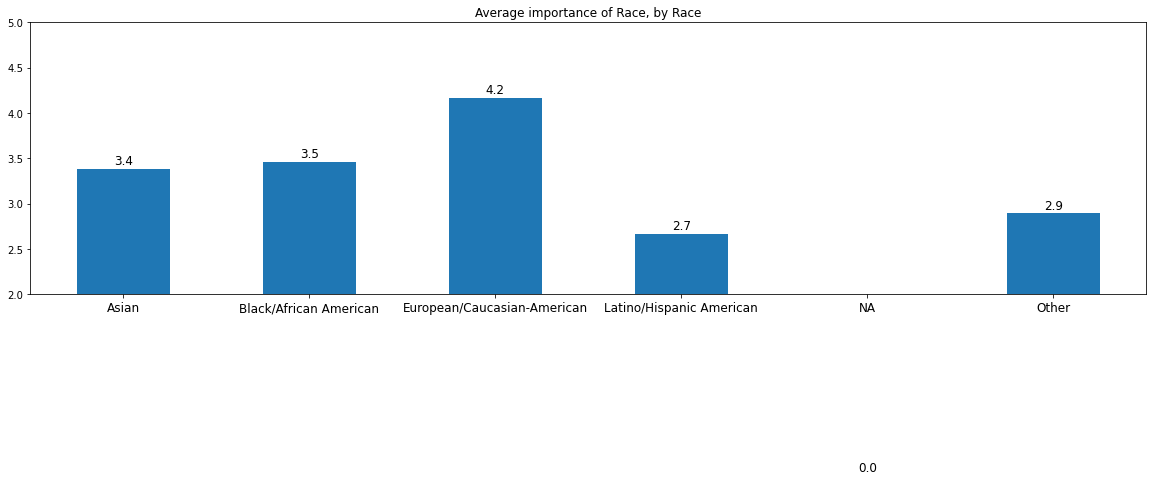

In [226]:
ax = df_unique[['race_label', 'imprace']].groupby('race_label').mean().plot(kind='bar', figsize=(20,5), legend=False,
                                               title='Average importance of Race, by Race',
                                                   ylim=(2,5))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation='horizontal')
ax.set_xlabel('',fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

is Gender plays a role in that ?

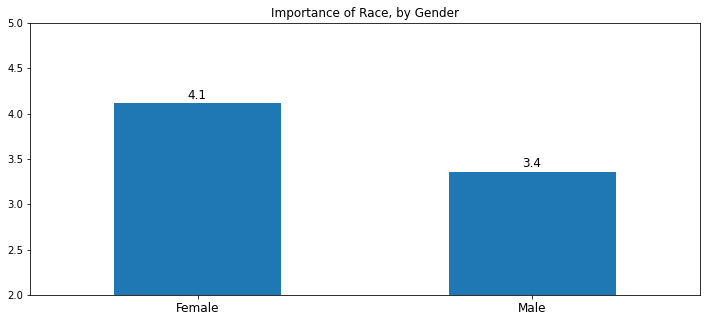

In [218]:
ax = df_unique[['gender', 'imprace']].groupby('gender').mean().plot(kind='bar', figsize=(12,5), legend=False,
                                               title='Importance of Race, by Gender',
                                                   ylim=(2,5))
ax.set_xticklabels(['Female', 'Male'], fontsize=12, rotation='horizontal')
ax.set_xlabel('',fontsize=1)

for i in ax.patches:
    ax.text(i.get_x()+.22, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

> Females declare to care about race more than males.

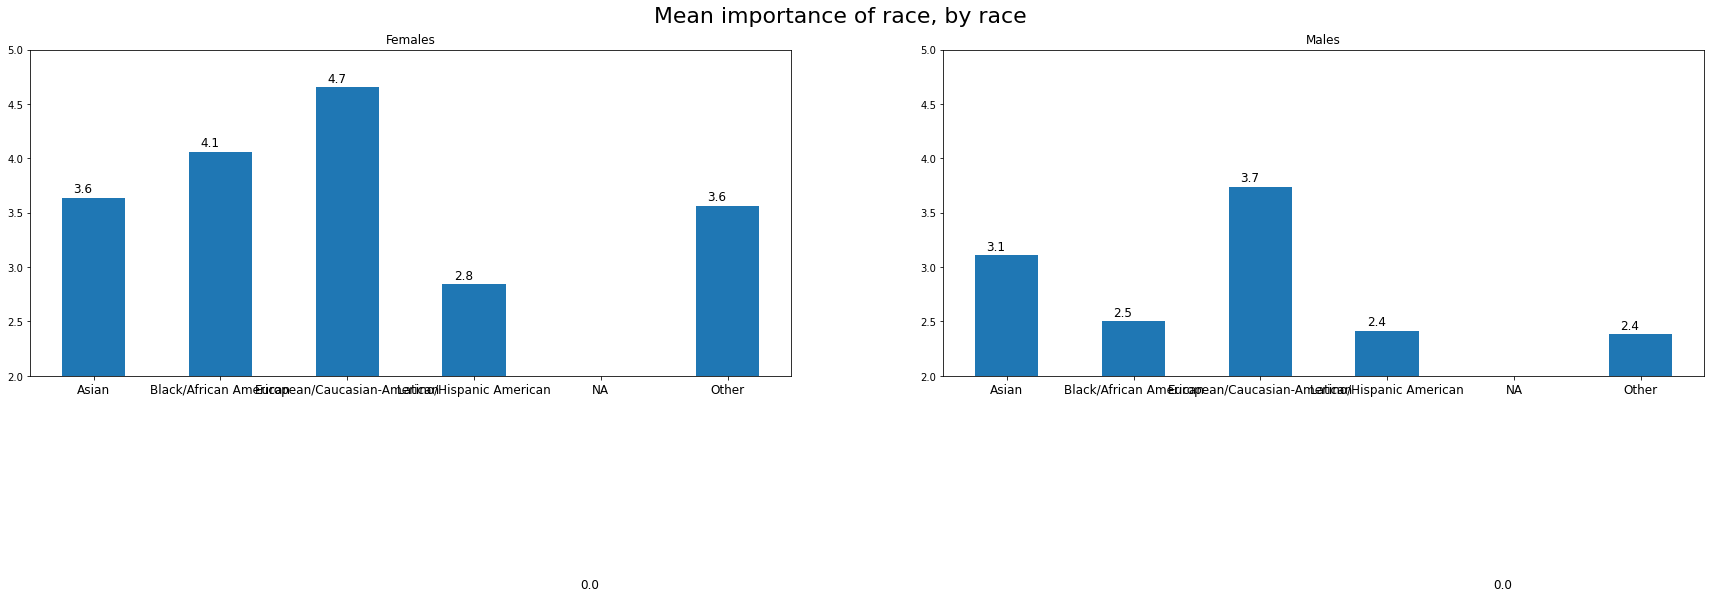

In [240]:
fig, ax= plt.subplots(1,2, figsize=(30, 6))

df_unique[df_unique.gender_label=='Female'][['race_label', 'imprace']].groupby('race_label').mean().plot(kind='bar', ax=ax[0], legend=False,
                                                              title='Females', ylim=(2,5))

df_unique[df_unique.gender_label=='Male'][['race_label', 'imprace']].groupby('race_label').mean().plot(kind='bar', ax=ax[1], legend=False,
                                                              title='Males', ylim=(2,5))

ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[1].set_xticklabels(ax[0].get_xticklabels(), fontsize=12, rotation='horizontal')
ax[0].set_xlabel('',fontsize=1)
ax[1].set_xlabel('',fontsize=1)

fig.suptitle('Mean importance of race, by race', fontsize=22)

for i in ax[0].patches:
    ax[0].text(i.get_x()+.09, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)
    
for i in ax[1].patches:
    ax[1].text(i.get_x()+.09, i.get_height()+.05, \
            str(round((i.get_height()), 1)), fontsize=12)

> the importance race value is verry influenced by gender of the participant, with European/Caucasian females declaring the highest value and Black

#### Do we care about religion ?

In [227]:
fig = px.histogram(x=df_unique['imprelig'], title="Importance of religion")
fig.show()

> No, For the majority of person the religion is not the important feature.

#### Activities interested

May be shared interests could be an important variable

In [271]:
activities_interested=['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','reading',
                       'tv','theater','movies','concerts','music','shopping','yoga']
activities = df_unique.groupby(['gender_label']).mean()[activities_interested].values

Text(0.5, 1.0, 'Correlation between interests')

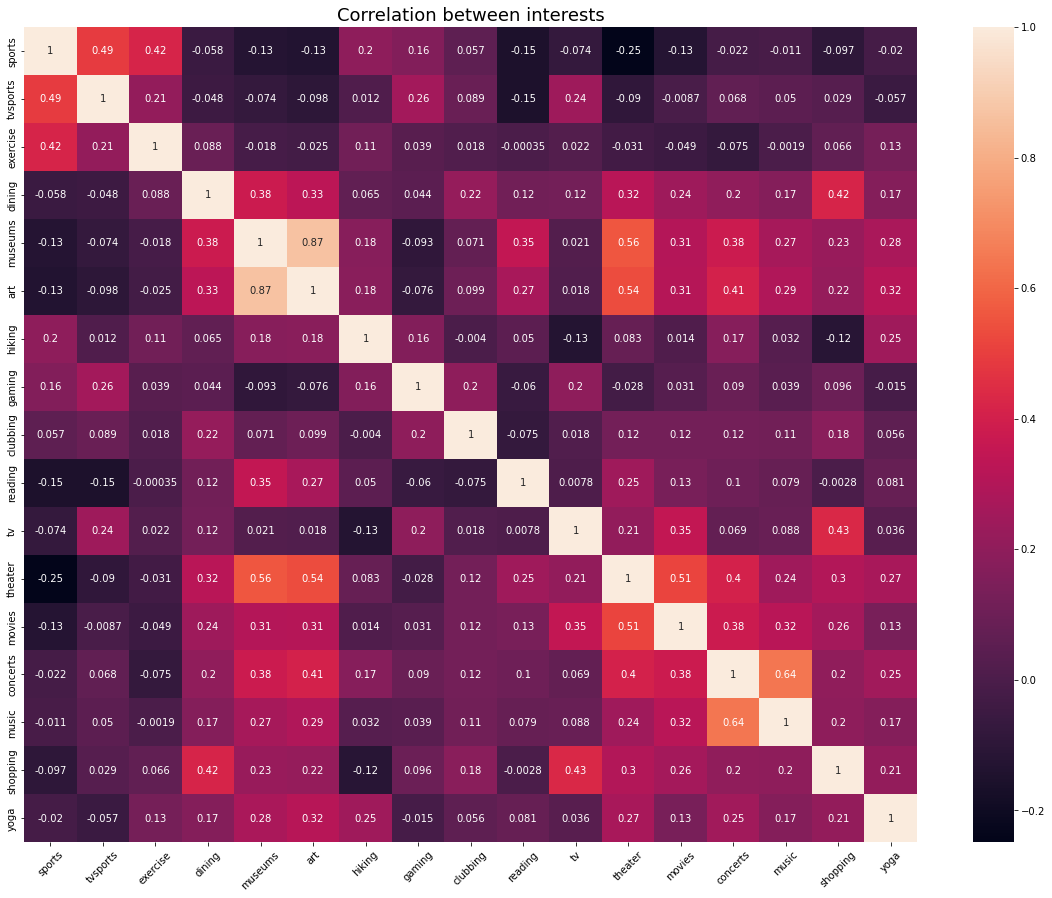

In [287]:
corr = df_unique[activities_interested].corr()
plt.figure(figsize=(20,15))
ax = sns.heatmap(corr, annot=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between interests', fontsize=18)

> We have some correlations going in there but not a surprise,
- People who loves **art** likes also **museums** 
- People who loves **music** likes also **concerts**
- People who loves **movies** likes also **theater**
- People who loves **theater** likes also **museums**

In [277]:
trace1 = go.Bar(
    x=activities_interested,
    y=activities[0,:],
    name='Women',
    #orientation = 'h',
    marker=dict(
        color='pink'
    )
)
trace2 = go.Bar(
    x=activities_interested,
    y=activities[1,:],
    name='Men',
    #orientation = 'h',
    marker=dict(
        color='darkblue'
    )
)

data3 = [trace1, trace2]
layout = go.Layout(
    title='Interest by activities Men vs Women',
    font=dict(
        size=16
    ),
    barmode = 'group',
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data3, layout=layout)
fig.show()

> Women's are more interest have an higer average on all activities than male except in **sports, tvsports and gaming**

In [ ]:
Now We studied the population, Go find out What influences the decision of partner

### Rating and Deciding

#### How Many Speed Dates found a match

<AxesSubplot:>

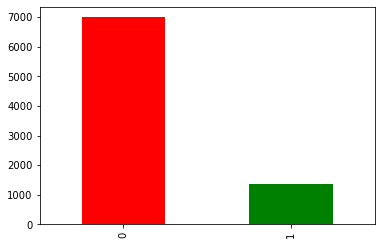

In [260]:
df['match'].value_counts().plot(kind='bar', color={'red': 'match', 'green': 'red'})

In [270]:
print(f"only about {df['match'].value_counts(normalize=True)[1] * 100 : .0f}% of dates are succeeded with a second date")

only about  16% of dates are succeeded with a second date


In [ ]:
> Let's 